In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import minimize
from scipy import optimize
from scipy.integrate import odeint
from scipy import fftpack


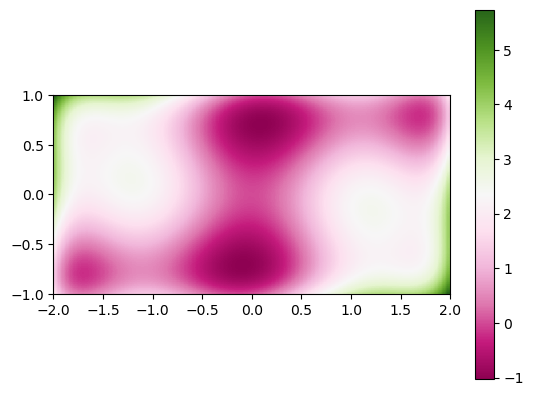

Minimum:  [-0.08984202  0.71265644] Value:  -1.031628453489866
Minimum:  [ 0.08984201 -0.71265645] Value:  -1.0316284534898557
Minimum:  [-0.08984204  0.71265646] Value:  -1.0316284534898537
Minimum:  [ 0.08984202 -0.71265647] Value:  -1.0316284534898428
Minimum points:  [0. 0.] Value at that point:  0.0


In [2]:
#%% QUESTION 1
def f(x,y):
    return (4- 2.1*(x**2) + (x**4)/3)*x**2 + x*y + (4*(y**2) - 4)*y**2

x = np.linspace(-2.0, 2.0, 100)
y = np.linspace(-1.0, 1.0, 100)
x, y = np.meshgrid(x,y)

fig = plt.figure()
image = plt.imshow(f(x,y), cmap='PiYG', extent=[-2, 2, -1, 1])
plt.colorbar(image, orientation='vertical')
plt.show()


def func_min(initials):
    return f(*initials) # passing argument

int_point = [[0,0.5], [0,-0.5], [-1, 0.5], [1, -0.5]]

for initials in int_point:
    minimum = minimize(func_min, initials)
    print("Minimum: ", minimum.x, "Value: ", minimum.fun)
    
min_point = minimize(func_min, [0,0])
print("Minimum points: ", min_point.x, "Value at that point: ", min_point.fun)


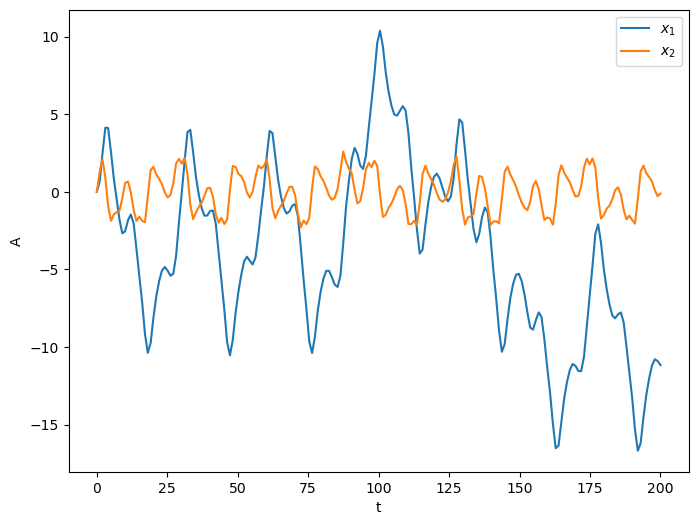

In [3]:
#%% QUESTION 2

def derivative(X,t,Q,d,Omega):
    return(X[1], (-1/Q)*X[1] + np.sin(X[0]) + d*np.cos(Omega*t))

# Set the initial conditions and parameter values
Q=2
d=1.5
Omega = 0.65
Xinit = [0, 0]

# Set the time points at which to evaluate the solution
t = np.linspace(0, 200, 200)

# Solve the differential equations
X = odeint(derivative, Xinit, t, args=(Q,d,Omega))

plt.figure(figsize=(8, 6))
plt.plot(t, X[:, 0], label="$x_1$") #theta = X[:, 0]
plt.plot(t, X[:, 1], label="$x_2$") #omega = X[:, 1]

plt.xlabel('t')
plt.ylabel('A')
plt.legend(loc='best')

--2023-01-20 18:32:00--  https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ebe1cnyd2gm836a/populations.txt [following]
--2023-01-20 18:32:01--  https://www.dropbox.com/s/raw/ebe1cnyd2gm836a/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca39dbe3db52fa146d85109a130.dl.dropboxusercontent.com/cd/0/inline/B04CuHQC8EGxwe7Ka5yK8Qfmapzey40pljvBnmfRP0iUSx4xcP3xYF4lDYwt_cevzvPMOSqEnTcytd1bbS89HS_QBvc32sUp-wufLMaDyx2xPAqJFWmZZ8wVeCLPKvnRnOXryzoVmQ5VvfI2ho4BND_fcm8KFiNTk534EBSTz2quCw/file# [following]
--2023-01-20 18:32:01--  https://uca39dbe3db52fa146d85109a130.dl.dropboxusercontent.com/cd/0/inline/B04CuHQC8EGxwe7Ka5yK8Qfmapzey40pljvBnmfRP0iUSx4xcP3xYF4lDYwt_cevzvPMOSqEnTcytd1bbS89HS_QBvc32sUp-

[         inf  21.          10.5          7.           5.25
   4.2          3.5          3.           2.625        2.33333333
   2.1         -2.1         -2.33333333  -2.625       -3.
  -3.5         -4.2         -5.25        -7.         -10.5
 -21.        ]


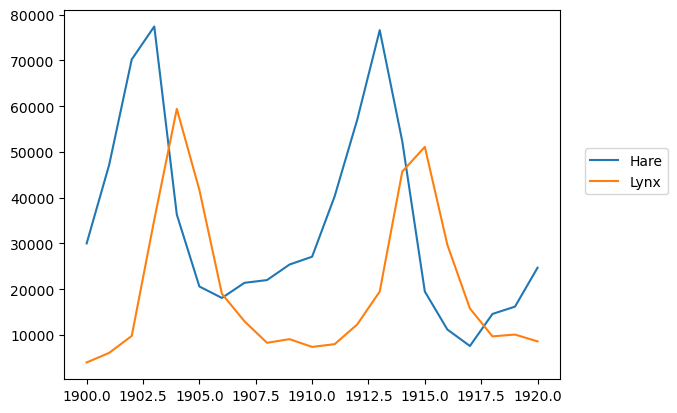

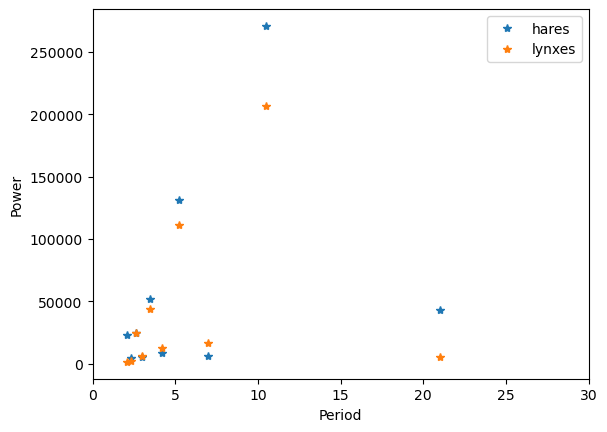

In [5]:
#%%QUESTION 3
#!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T

plt.figure()
plt.plot(year, hares, year, lynxes) 
plt.legend(('Hare', 'Lynx'), loc=(1.05, 0.5))

hares_fft = fftpack.fft(hares)
lynxes_fft = fftpack.fft(lynxes)

power_hares = np.abs(hares_fft)
power_lynxes = np.abs(lynxes_fft)

sample_freq = fftpack.fftfreq(data.shape[0], year[1]-year[0])

period = 1 /sample_freq
print(period)
plt.figure()
plt.plot(period,power_hares,'*',  label='hares')
plt.plot(period,power_lynxes, '*', label='lynxes')
plt.xlim(0, 30)
plt.xlabel('Period')
plt.ylabel('Power')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Filtered Image')

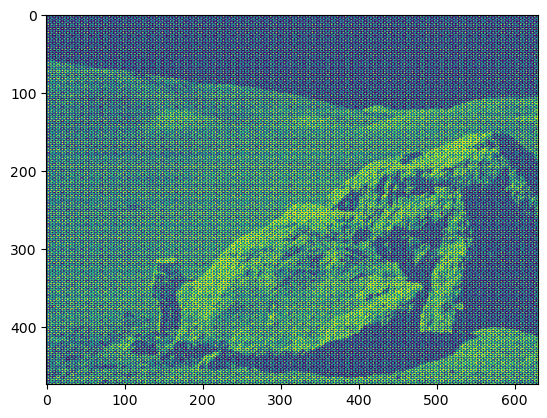

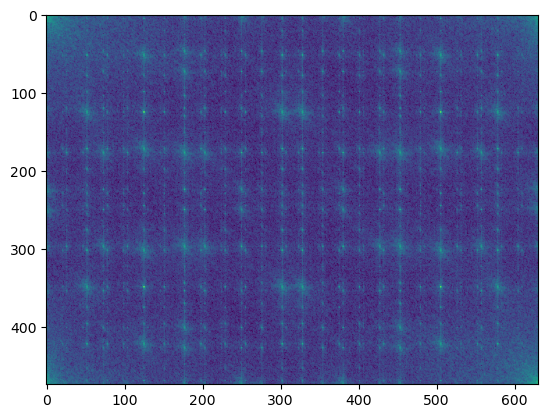

<Figure size 640x480 with 0 Axes>

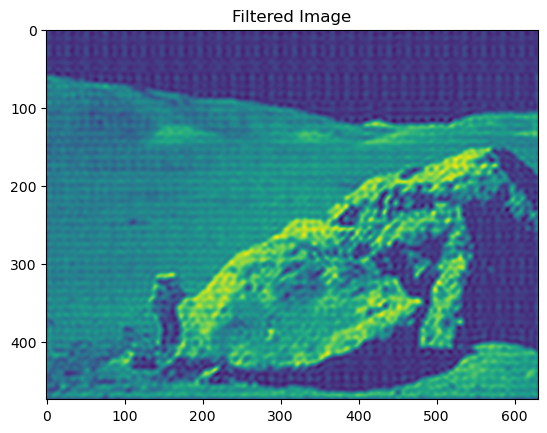

In [6]:
#%% QUESTION 4
#plt.imread("img/moonlanding.png")
img= plt.imread("img/moonlanding.png")
plt.imshow(img)
plt.figure()
fft_img = fftpack.fft2(img)
plt.imshow(abs(fft_img), norm=LogNorm(vmin=5))
plt.figure()

#fraction of coefficients
filt_coef = 0.1

m, n = fft_img.shape #column and row size

# Setting noise regions to zero
fft_img[int(m*filt_coef):int(m*(1-filt_coef))] = 0 #setting the rows
fft_img[:, int(n*filt_coef):int(n*(1-filt_coef))] = 0 #setting the columns

filt_img = fftpack.ifft2(fft_img).real #inverse fft
plt.figure()
plt.imshow(filt_img)
plt.title('Filtered Image')